In [1]:
import os 
import numpy as np 
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc 
import matplotlib.pyplot as plt

mean_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/running_model_free_multiple/mean_model_map.mrc"
locscaled_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/running_model_free_multiple/final_locscale.mrc"
var_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/running_model_free_multiple/var_model_map.mrc"

mean_map, apix = load_map(mean_map_path)
locscaled_map, apix = load_map(locscaled_map_path)
var_map, apix = load_map(var_map_path)


In [2]:
n = 25 
std_map = np.sqrt(var_map)
std_error = std_map / np.sqrt(n)
z_score = (locscaled_map - mean_map) / std_error

In [3]:
mask_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/running_model_free_multiple/iteration_0/processing_files/EMD_3061_unfiltered_confidenceMap.mrc"
mask, apix = load_map(mask_path)

mask_binarise = (mask > 0.5).astype(bool) 

z_score_array = z_score[mask_binarise]
diff_map_array = locscaled_map - mean_map
diff_map_array = diff_map_array[mask_binarise]

<AxesSubplot:ylabel='Count'>

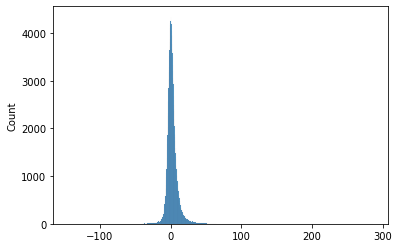

In [4]:
import seaborn as sns
sns.histplot(z_score_array)

In [6]:
# print number of z scores which are positive and negative
print("Number of positive z scores: {}".format(np.sum(z_score_array > 0)))
print("Number of negative z scores: {}".format(np.sum(z_score_array < 0)))

Number of positive z scores: 131545
Number of negative z scores: 88645


In [29]:
from scipy.stats import normaltest
from scipy.stats import shapiro 
# normality test
stat, p = normaltest(diff_map_array)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=48668.643, p=0.000


In [30]:
# shapiro test

shapiro_test = shapiro(diff_map_array)
print(shapiro_test)

ShapiroResult(statistic=0.9019384980201721, pvalue=0.0)


/home/abharadwaj1/miniconda3/envs/locscale_dev/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


((array([-4.516201  , -4.32458062, -4.22060013, ...,  4.22060013,
          4.32458062,  4.516201  ]),
  array([-144.49327, -113.78299, -113.46487, ...,  221.29614,  237.06665,
          286.15598], dtype=float32)),
 (7.524228933048047, 2.223491430282592, 0.8835197659229962))

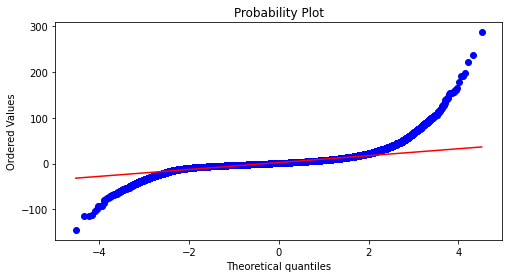

In [35]:
from scipy.stats import probplot

# Plotting the QQ-plot
fig, ax = plt.subplots(figsize=(8, 4))
probplot(z_score_array, plot=ax)


In [32]:
from scipy.stats import norm

example_standard_norm = norm(0, 1)

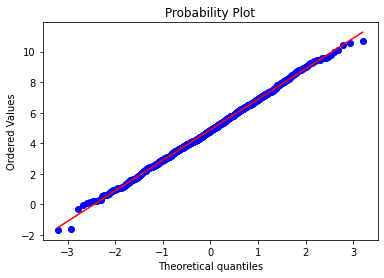

In [33]:
data_norm = norm.rvs(size=1000, loc=5, scale=2)
probplot(data_norm, plot=plt);

In [34]:
# calculate p-value map 

# two sided 
p_value_map = (1 - norm.cdf(abs(z_score))) * 2

output_folder = os.path.dirname(locscaled_map_path) 

p_value_map_path = os.path.join(output_folder, os.path.basename(locscaled_map_path).replace('.mrc', '_p_value.mrc'))
z_score_map_path = os.path.join(output_folder, os.path.basename(locscaled_map_path).replace('.mrc', '_z_score.mrc'))

save_as_mrc(p_value_map, p_value_map_path, apix)
save_as_mrc(z_score, z_score_map_path, apix)